# Ejercicios

## Ejercicio 1

Escribe un algoritmo `num_connected(G)` que, dada una gráfica `G`, regrese el número de componentes conexas que tiene.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

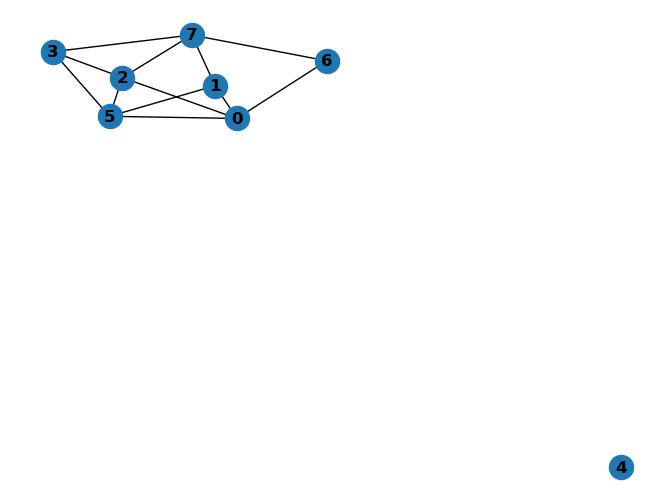

In [12]:
G = nx.gnp_random_graph(8, 1/3)
nx.draw(G, with_labels=True, font_weight='bold')

In [32]:
def dfs(G, v, visited):
    visited[v] = True  # Marca el nodo actual como visitado
    
    for u in G.neighbors(v):
        if not visited[u]:
            dfs(G, u, visited)

def num_connected(G):
    # Inicializa el diccionario de nodos visitados
    visited = {node: False for node in G.nodes}
    
    num_componentes_conexas = 0
    
    # Recorre todos los nodos del grafo
    for v in G.nodes:
        if not visited[v]:
            # Si el nodo no ha sido visitado, es el comienzo de una nueva componente conexa
            num_componentes_conexas += 1
            # Llama a DFS para marcar todos los nodos en esta componente conexa
            dfs(G, v, visited)
    
    return num_componentes_conexas

# Generar un grafo aleatorio
G = nx.gnp_random_graph(8, 1/3)

# Contar el número de componentes conexas
num = num_connected(G)
print(f"componentes conexas: {num}")


componentes conexas: 2


## Ejercicio 2

Dada una matriz de 0s y 1s, donde los 0s representan agua y los 1s tierra, escribe un algoritmo de NetworkX que cuente el número de *islas* que hay. Una isla se define como un conjunto de celdas de tierra conectadas por alguno de sus cuatro lados. Deberás escribir una función para convertir la matriz a una gráfica que la represente adecuadamente.

Por ejemplo, consideremos la siguiente matriz:

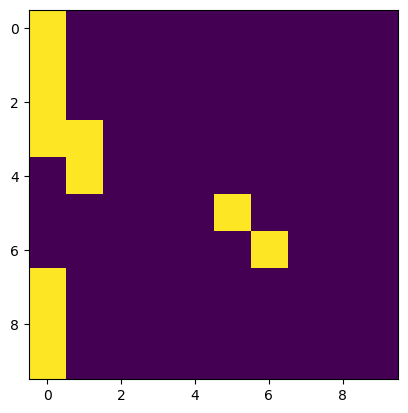

In [23]:
M = np.zeros((10, 10))
M[0, 0] = M[1, 0] = M[2, 0] = M[3, 0] = M[3, 1] = M[4, 1] = 1
M[5, 5] = 1
M[7, 0] = M[8, 0] = M[9, 0] = 1
M[6, 6] = 1

plt.imshow(M)

Tu función debe de regresar **4** islas (nota que las dos islas de la derecha están separadas, ya que solo se tocan diagonalmente).

In [27]:
def matriz_a_grafo(matriz):
    G = nx.Graph()
    filas, columnas = matriz.shape

    for i in range(filas):
        for j in range(columnas):
            if matriz[i, j] == 1:
                # Agregar el nodo correspondiente
                G.add_node((i, j))

                # Conectar con nodos adyacentes (arriba, abajo, izquierda, derecha)
                if i > 0 and matriz[i-1, j] == 1:
                    G.add_edge((i, j), (i-1, j))
                if i < filas-1 and matriz[i+1, j] == 1:
                    G.add_edge((i, j), (i+1, j))
                if j > 0 and matriz[i, j-1] == 1:
                    G.add_edge((i, j), (i, j-1))
                if j < columnas-1 and matriz[i, j+1] == 1:
                    G.add_edge((i, j), (i, j+1))
                    
    return G

def contar_islas(matriz):
    G = matriz_a_grafo(matriz)
    
    # Encontrar las componentes conexas en el grafo
    componentes = list(nx.connected_components(G))
    
    return len(componentes)

# Contar el número de islas
num_islas = contar_islas(M)
print(f"El número de islas es: {num_islas}")


El número de islas es: 4
